<a href="https://colab.research.google.com/github/Divyaanshvats/Machine-Learning-Based-Return-Predictors-and-the-Spanning-Controversy-in-Micro-Finance/blob/main/DIC_LOAN_STATUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LOAN PREDICTION:**

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
data1=pd.read_csv('/content/status.csv')
data2=pd.read_csv("/content/property_area.csv")
data1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#Delete ID column because no information can be extracted
data1.drop('Loan_ID',axis=1,inplace=True)
data2.drop('Loan_ID',axis=1,inplace=True)

In [6]:
print('Shape of data1:',data1.shape,'and','Shape of data2:',data2.shape)

Shape of data1: (614, 12) and Shape of data2: (367, 11)


In [7]:
data1.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [8]:
data2.isnull().sum()

,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6
Credit_History,29


### **Removing all the missing data by filling them with the most occurred once**

In [10]:
print("Missing Values Before Imputation\n\n", "#" * 30, "\n")

columns_with_na = ['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents',
                   'Loan_Amount_Term', 'Gender', 'Married']

for feature in columns_with_na:
    print(f"{feature}:\n{data1[feature].value_counts()}\n", "-" * 50)
    data1[feature] = data1[feature].fillna(data1[feature].mode().iloc[0])

data1.isnull().sum().sort_values(ascending=False)

print("Missing Values After Imputation\n\n", "#" * 50, "\n")

for feature in columns_with_na:
    print(f"\n{feature}:\n{data1[feature].value_counts()}\n", "-" * 50)


Missing Values Before Imputation

 ############################## 

Credit_History:
Credit_History
1.0    525
0.0     89
Name: count, dtype: int64
 --------------------------------------------------
Self_Employed:
Self_Employed
No     532
Yes     82
Name: count, dtype: int64
 --------------------------------------------------
LoanAmount:
LoanAmount
120.0    42
110.0    17
100.0    15
187.0    12
160.0    12
         ..
292.0     1
142.0     1
350.0     1
496.0     1
253.0     1
Name: count, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64
 --------------------------------------------------
Gender:
Gender
Male      502
Female    112

## **DATA VISUALIZATION**

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


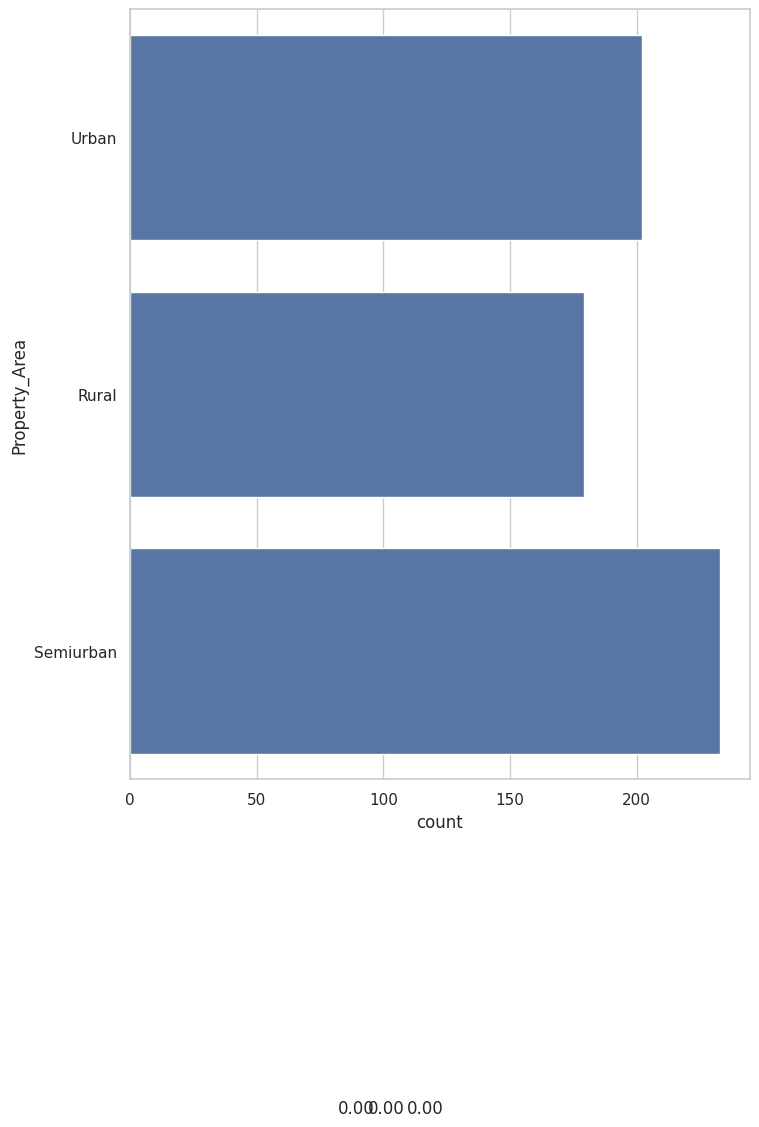

In [15]:
num=data1.select_dtypes('number').columns.to_list()
cat=data2.select_dtypes('object').columns.to_list()
loan_num=data1[num]#numeric df
loan_cat=data1[cat]#categoric df
print(data1[cat[-1]].value_counts())

total = float(len(data1[cat[-1]]))
plt.figure(figsize=(8,10))
sns.set(style="whitegrid")
ax = sns.countplot(data1[cat[-1]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center")
plt.show()

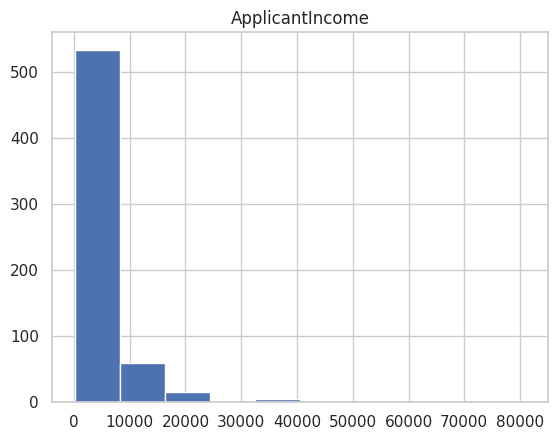

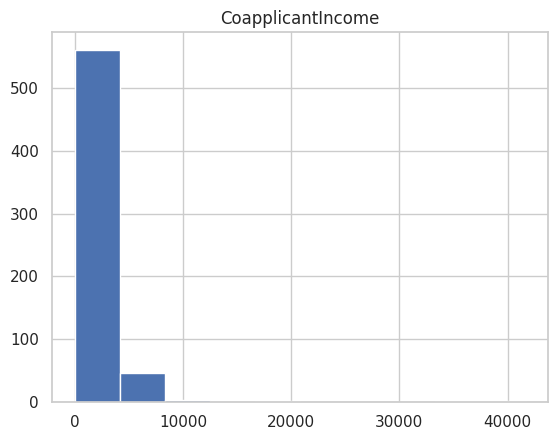

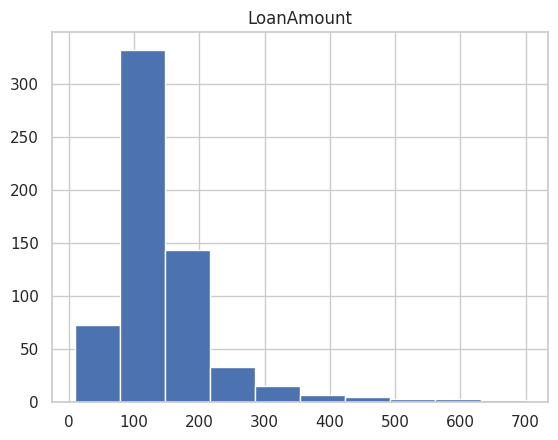

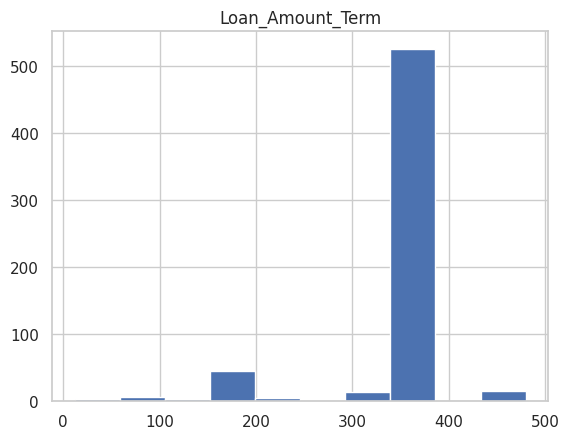

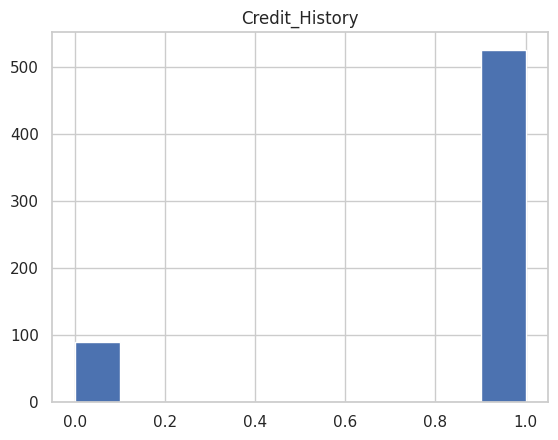

In [21]:
for i in loan_num:
  plt.hist((loan_num[i]))
  plt.title(i)
  plt.show()

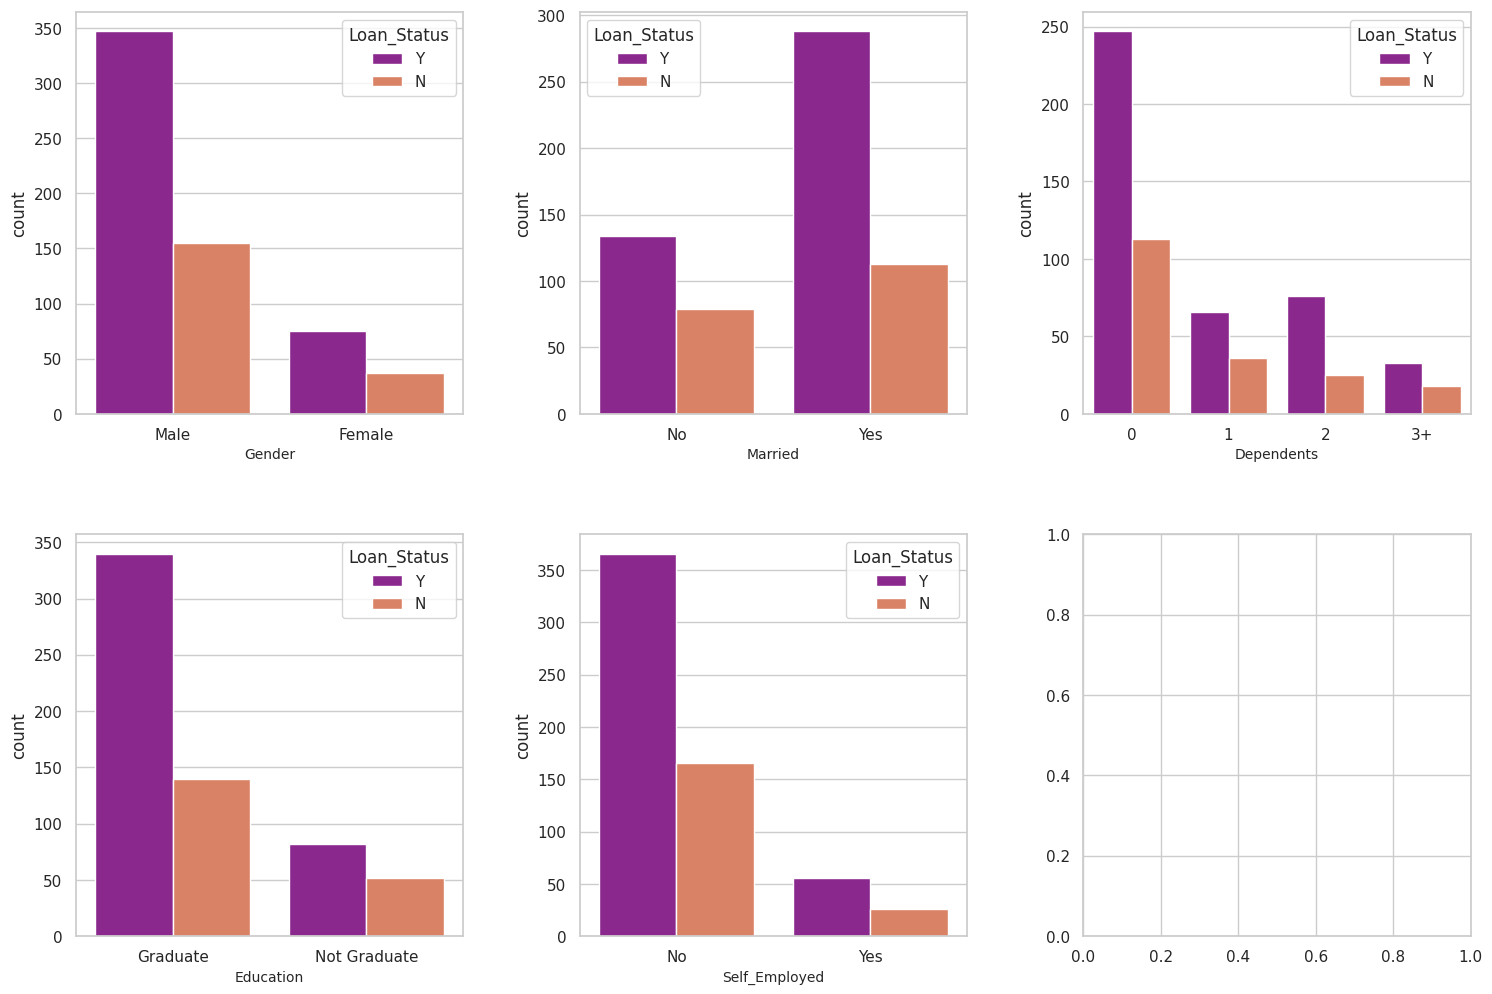

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

for idx, i in enumerate(cat[:-1]):
    row, col = divmod(idx, 3)
    sns.countplot(x=i, hue='Loan_Status', data=data1, palette='plasma', ax=axes[row, col])
    axes[row, col].set_xlabel(i, fontsize=10)

plt.show()


## **Converting Categorical values to numerical values**

In [30]:
to_numeric = {
    'Male': 1, 'Female': 2,
    'Yes': 1, 'No': 2,
    'Graduate': 1, 'Not Graduate': 2,
    'Urban': 3, 'Semiurban': 2, 'Rural': 1,
    'Y': 1, 'N': 0,
    '3+': 3
}

# Convert categorical values to numeric
data1 = data1.map(lambda label: to_numeric.get(label, label))
data2 = data2.map(lambda label: to_numeric.get(label, label))

# Convert 'Dependents' column only if it exists in the dataset
if 'Dependents' in data1.columns:
    Dependents_ = pd.to_numeric(data1['Dependents'])
    data1.drop(['Dependents'], axis=1, inplace=True)
    data1 = pd.concat([data1, Dependents_], axis=1)

if 'Dependents' in data2.columns:
    Dependents__ = pd.to_numeric(data2['Dependents'])
    data2.drop(['Dependents'], axis=1, inplace=True)
    data2 = pd.concat([data2, Dependents__], axis=1)

# Checking dataset shapes and info
print(f"Training set (rows, cols): {data1.shape}\nTesting set (rows, cols): {data2.shape}\n")
print(data1.info(), "\n\n", data2.info())


Training set (rows, cols): (614, 12)
Testing set (rows, cols): (367, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 col

<Axes: >

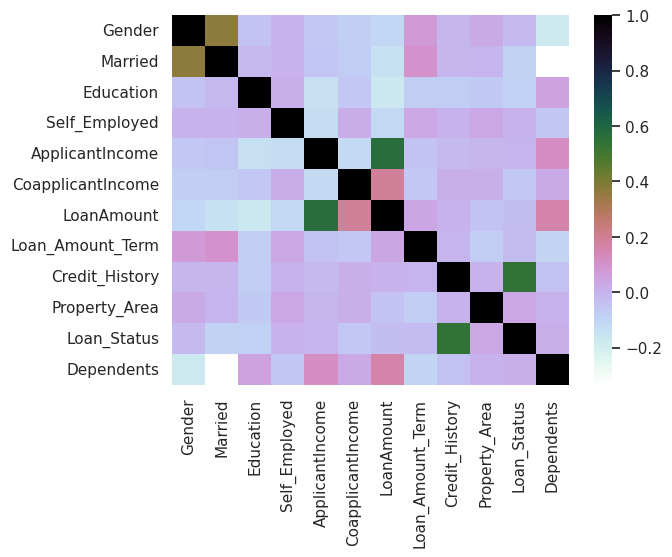

In [32]:
#Correlation matrix
sns.heatmap(data1.corr() ,cmap='cubehelix_r')

In [34]:
#correlation table
corr=data1.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.000,0.365,-0.045,-0.001,-0.059,-0.083,-0.106,0.074,-0.009,0.026,-0.018,-0.173
Married,0.365,1.000,-0.012,0.004,-0.052,-0.076,-0.146,0.101,-0.011,-0.004,-0.091,-0.334
Education,-0.045,-0.012,1.000,0.010,-0.141,-0.062,-0.169,-0.074,-0.074,-0.065,-0.086,0.056
Self_Employed,-0.001,0.004,0.010,1.000,-0.127,0.016,-0.115,0.034,0.002,0.031,0.004,-0.057
ApplicantIncome,-0.059,-0.052,-0.141,-0.127,1.000,-0.117,0.565,-0.047,-0.019,-0.009,-0.005,0.118
CoapplicantIncome,-0.083,-0.076,-0.062,0.016,-0.117,1.000,0.190,-0.059,0.011,0.011,-0.059,0.030
LoanAmount,-0.106,-0.146,-0.169,-0.115,0.565,0.190,1.000,0.037,-0.000,-0.047,-0.032,0.163
Loan_Amount_Term,0.074,0.101,-0.074,0.034,-0.047,-0.059,0.037,1.000,-0.005,-0.076,-0.023,-0.104
Credit_History,-0.009,-0.011,-0.074,0.002,-0.019,0.011,-0.000,-0.005,1.000,0.002,0.541,-0.040
Property_Area,0.026,-0.004,-0.065,0.031,-0.009,0.011,-0.047,-0.076,0.002,1.000,0.032,-0.000


## **MACHINE LEARNING MODEL**

In [36]:
y = data1['Loan_Status']
X = data1.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

**DECISION TREE CLASSIFIER**

In [37]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_predict=DT.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.49      0.51      0.50        51
           1       0.81      0.80      0.80       134

    accuracy                           0.72       185
   macro avg       0.65      0.65      0.65       185
weighted avg       0.72      0.72      0.72       185

[[ 26  25]
 [ 27 107]]
0.7189189189189189


**Random Forest Classifier**

In [38]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_predict=RF.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.43      0.52        51
           1       0.81      0.92      0.86       134

    accuracy                           0.78       185
   macro avg       0.74      0.67      0.69       185
weighted avg       0.77      0.78      0.77       185

[[ 22  29]
 [ 11 123]]
0.7837837837837838


**XGBOOST**

In [44]:
XG=XGBClassifier()
XG.fit(X_train,y_train)
y_predict=XG.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.69      0.53      0.60        51
           1       0.84      0.91      0.87       134

    accuracy                           0.81       185
   macro avg       0.76      0.72      0.74       185
weighted avg       0.80      0.81      0.80       185

[[ 27  24]
 [ 12 122]]
0.8054054054054054


**Logistic Regression**

In [47]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_predict=LR.predict(X_test)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

[[ 22  29]
 [  2 132]]
0.8324324324324325


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## **CONCLUSION**

In [51]:
#Store all the accuracy score in a variable
DT_AS = accuracy_score(y_predict,y_test)
RF_AS = accuracy_score(y_predict,y_test)
XG_AS = accuracy_score(y_predict,y_test)
LR_AS = accuracy_score(y_predict,y_test)

In [54]:
score = [DT_AS,RF_AS,XG_AS,LR_AS]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,n_neighbors,Score
0,Decision Tree,0.832432
1,Random Forest,0.832432
2,XGBoost,0.832432
3,Logistic Regression,0.832432
